In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
np.random.seed(0)

# linear regression

In [131]:
num_points = 1000
a = 5
b = 1
noise = np.random.normal(0, 1, num_points)
x = np.random.uniform(0, 3, num_points)
y = a * x + b + noise

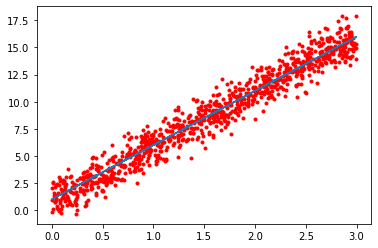

In [132]:
plt.scatter(x, y, marker = '.', color = 'r')
plt.plot(x, a * x + b)

In [133]:
def compute_cost(X, y, a, b):
    return sum((y - (x*a + b))**2) / (2 * len(X))

In [134]:
a1 = 1
b1 = 0
alpha = 0.1

m = len(x)
for i in range(200):
    #cost.append(compute_cost(x, y, theta, b1))
    a1 = a1 + alpha * 1/m * np.sum((y - (x*a1 + b1)) * x)
    b1 = b1 + alpha * 1/m * np.sum((y - (x*a1 + b1)))
cost = compute_cost(x, y, a1, b1)

In [135]:
print(a1, b1, cost)

5.076557635783325 0.8384913689888682 0.48461938491660533


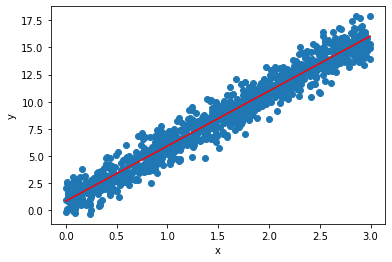

In [136]:
extremes = np.array([np.min(x), np.max(x)])
line = extremes*a1 + b1
plt.plot(extremes, line, 'r-')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# logistic regression

In [137]:
mean1 = [-3, 0]
cov1 = [[2, -1], 
        [-1, 1]]

mean2 = [1, 3]
cov2 = [[1, 0], 
        [0, 3]]
        
num_points = 1000

In [138]:
x1 = np.random.multivariate_normal(mean1, cov1, num_points)
x2 = np.random.multivariate_normal(mean2, cov2, num_points)

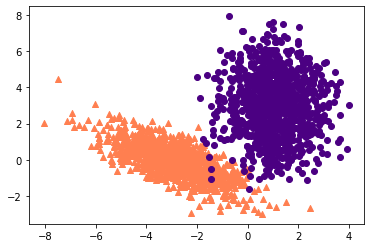

In [139]:
plt.scatter(x1[:, 0], x1[:, 1], marker = '^', color='coral')
plt.scatter(x2[:, 0], x2[:, 1], marker = 'o', color='indigo')

In [140]:
x = np.concatenate([x1, x2])
y = np.array([0]*num_points + [1]*num_points)

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [143]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [144]:
def grad(X, y, a, b):
    y_hat = sigmoid(X.dot(a) + b)
    cost = -(y*np.log(y_hat) + (1 - y)*np.log(1 - y_hat)).mean()  

    da = np.dot(X.T, (y_hat - y)) / len(X)
    db = np.sum(y_hat - y) / len(X)
        
    cost = np.squeeze(cost)
        
    return da, db, cost

In [145]:
def predict(X, a, b):
    y_hat = sigmoid(np.dot(X, a) + b)
    y_pred = np.where(y_hat >= 0.5, 1, 0)
    return y_pred

In [146]:
a = np.zeros(x.shape[1])
b = 0
iterations = 10000
alpha = 0.1

for iter in range(iterations):
    da, db, cost = grad(X_train, y_train, a, b)
    a = a - alpha * da
    b = b - alpha * db

In [147]:
predictions = predict(X_test, a, b)

In [148]:
from sklearn.metrics import accuracy_score

In [149]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.99